# Zadanie domowe

W przypadku obrazów w odcieniach szarości pojedynczy piksel z zakresu [0; 255] reprezentowany jest jako 8-bitowa liczba bez znaku.
Pewnym rozszerzeniem analizy sposobu reprezentacji obrazu może być następujący eksperyment.
Załóżmy, że z każdego z 8 bitów możemy stworzyć pojedynczy obraz binarny (ang. _bit-plane slicing_).
Dla obrazka _100zloty.jpg_ (https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/100zloty.jpg) stwórz 8 obrazów, z których każdy powinien zawierać jedną płaszczyznę bitową.
Podpowiedź $-$ warto sprawdzić, jak realizuje się bitowe operacje logiczne.
Zastosowanie takiej dekompozycji obrazu pozwala na analizę ,,ważności'' poszczególnych bitów.
Jest to użyteczne w kwantyzacji, ale także w kompresji.

W drugim etapie zadania proszę spróbować odtworzyć obraz oryginalny z mniejszej liczby obrazów binarnych.
Warto zacząć od dwóch najbardziej znaczących bitów, a później dodawać kolejne.
Należy utworzyć co najmniej trzy wersje zrekonstruowanych obrazów.
Podpowiedź $-$ rekonstrukcja obrazu to mnożenie przez odpowiednią potęgę liczby 2 (przesunięcie bitowe) oraz dodawanie.

In [1]:
import cv2
import os
import requests
import matplotlib.pyplot as plt

url = 'https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/'
fileName = '100zloty.jpg'
if not os.path.exists(fileName) :
    r = requests.get(url + fileName, allow_redirects=True)
    open(fileName, 'wb').write(r.content)

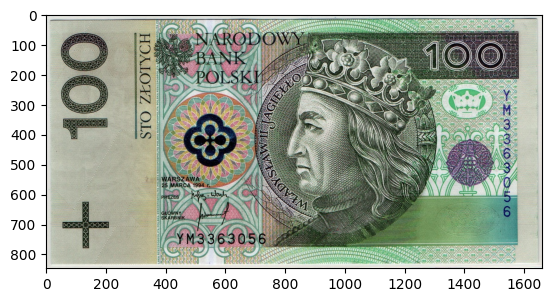

In [2]:
img = cv2.imread('100zloty.jpg')
plt.imshow(img)
plt.show()

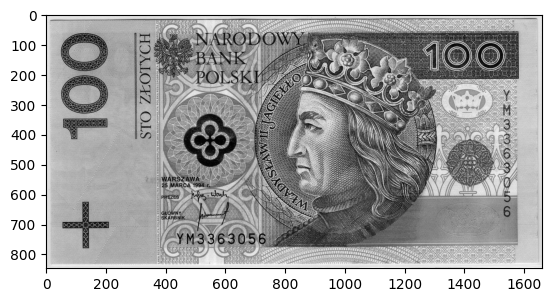

In [3]:
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(img, cmap='gray')
plt.show()

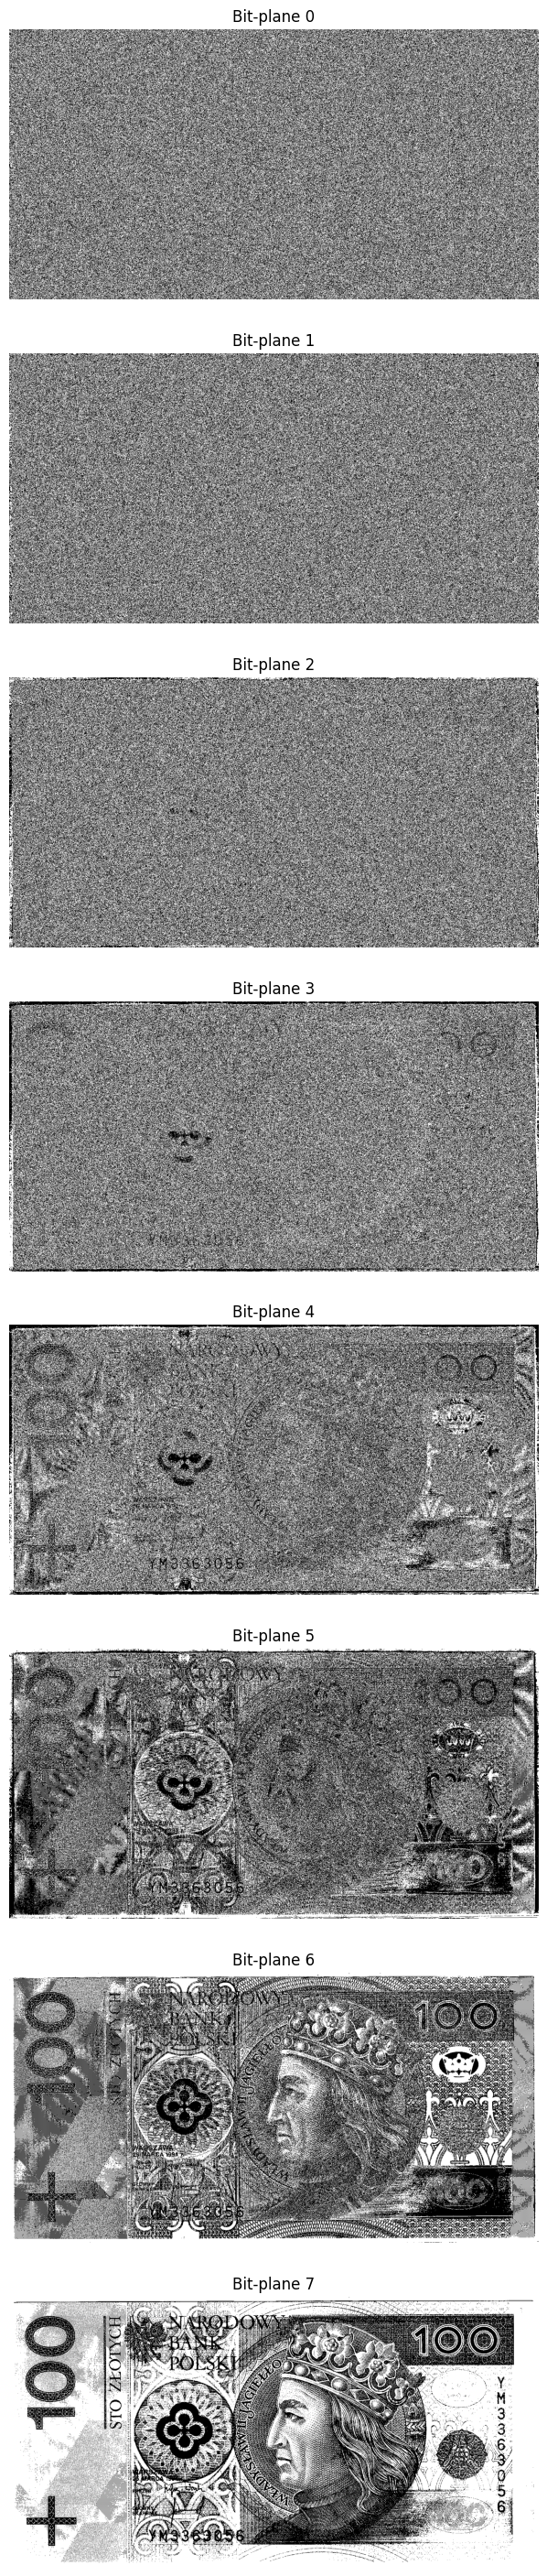

In [4]:
# Przesunięcie bitowe i operacja AND wyodrębniają poszczególne bity pikseli.
bit_planes = [(img >> i) & 1 for i in range(8)]

fig, axes = plt.subplots(8, 1, figsize=(12, 36))
for i, ax in enumerate(axes):
    ax.imshow(bit_planes[i], cmap='gray')
    ax.set_title(f'Bit-plane {i}')
    ax.axis('off')
plt.show()

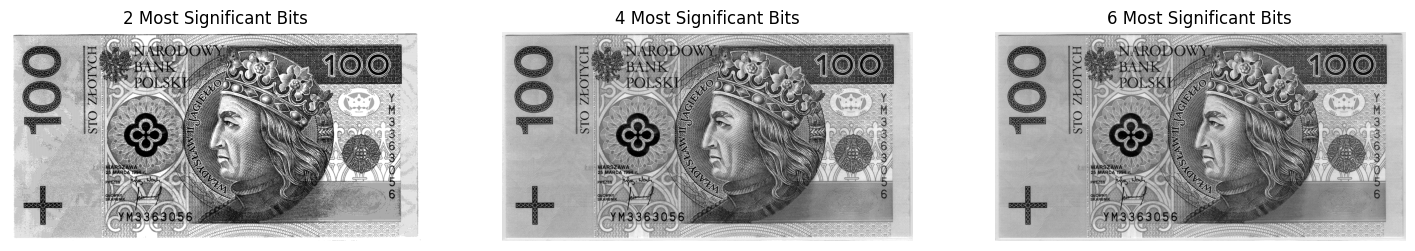

In [5]:
import numpy as np

def reconstruct(bit_planes, bit_chosen):
    reconstructed = np.zeros_like(bit_planes[0], dtype=np.uint8)
    for i in bit_chosen:
        reconstructed += (bit_planes[i] << i)
    return reconstructed
    
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
axes[0].imshow(reconstruct(bit_planes, [6, 7]), cmap='gray')
axes[0].set_title('2 Most Significant Bits')
axes[0].axis('off')

axes[1].imshow(reconstruct(bit_planes, [4, 5, 6, 7]), cmap='gray')
axes[1].set_title('4 Most Significant Bits')
axes[1].axis('off')

axes[2].imshow(reconstruct(bit_planes, [2, 3, 4, 5, 6, 7]), cmap='gray')
axes[2].set_title('6 Most Significant Bits')
axes[2].axis('off')

plt.show()